In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import gmaps


import requests
import time
from scipy.stats import linregress
import json
# Import API key
# Google developer API key
# from config import gkey


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Save file path to variable
metrotransit_csv = "TransitStopsBoardingsAndAlightings2019.csv"

# Read with Pandas
metrotransit_df = pd.read_csv(metrotransit_csv)
metrotransit_df.head(100)

,Provider,Route Type,Route Classification,Route,Dir,Site_id,Geo_Node_Name,Group ID,latitude,longitude,...,City,Trips,Obs Trips,Schedule,Ons,Offs,Seq,%Sampled,Downtown,Comment
0,Metro Transit,Urban Local,Core Local,2,East,51581.0,HENNEPIN AVE & FRANKLIN AVE / 22ND ST,NaN,44.961886,-93.292079,...,MINNEAPOLIS,92.0,92.0,Weekday,75,8.0,1.0,100%,N,NaN
1,Metro Transit,Urban Local,Core Local,2,East,1099.0,HENNEPIN AVE S & 22ND ST W,NaN,44.961030,-93.292777,...,MINNEAPOLIS,92.0,92.0,Weekday,33,2.0,2.0,100%,N,NaN
2,Metro Transit,Urban Local,Core Local,2,East,13340.0,DUPONT AVE & FRANKLIN AVE W,NaN,44.962534,-93.293016,...,MINNEAPOLIS,92.0,92.0,Weekday,17,1.0,3.0,100%,N,NaN
3,Metro Transit,Urban Local,Core Local,2,East,13337.0,FRANKLIN AVE W & HENNEPIN AVE S,NaN,44.962630,-93.291123,...,MINNEAPOLIS,92.0,92.0,Weekday,177,2.0,4.0,100%,N,NaN
4,Metro Transit,Urban Local,Core Local,2,East,56705.0,FRANKLIN AVE W & LYNDALE AVE S,NaN,44.962642,-93.287697,...,MINNEAPOLIS,92.0,92.0,Weekday,143,4.0,5.0,100%,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Metro Transit,Urban Local,Core Local,3,East,16172.0,KASOTA AVE SE & #500,NaN,44.977230,-93.208325,...,MINNEAPOLIS,10.0,10.0,Weekday,0,2.0,22.0,100%,N,NaN
96,Metro Transit,Urban Local,Core Local,3,East,16173.0,KASOTA AVE SE & #2550,NaN,44.977332,-93.206044,...,SAINT PAUL,10.0,10.0,Weekday,0,2.0,23.0,100%,N,NaN
97,Metro Transit,Urban Local,Core Local,3,East,16097.0,15TH AVE SE & COMO AVE SE,NaN,44.987657,-93.230290,...,MINNEAPOLIS,94.0,94.0,Weekday,38,311.0,24.0,100%,N,NaN
98,Metro Transit,Urban Local,Core Local,3,East,16093.0,COMO AVE SE & 18TH AVE SE,NaN,44.987765,-93.227127,...,MINNEAPOLIS,94.0,94.0,Weekday,17,131.0,25.0,100%,N,NaN


In [2]:
 Route_df = metrotransit_df.groupby("Route Type")
Route_df=Route_df.count()
site_route_df = metrotransit_df.groupby("Site_id")
site_route_df.head()

metrotransit_df["Site_id"].nunique()

metrotransit_df["Schedule"].unique()
Route_df.head()

,Provider,Route Classification,Route,Dir,Site_id,Geo_Node_Name,Group ID,latitude,longitude,x-coordinate,...,City,Trips,Obs Trips,Schedule,Ons,Offs,Seq,%Sampled,Downtown,Comment
Route Type,,,,,,,,,,,,,,,,,,,,,
Express,7546,7546,7546,7532,7546,7546,93,7546,7546,7546,...,7546,7546,5795,7546,5809,5795,7546,6698,7546,38
Suburban Local,8321,8321,8321,8321,8321,8321,228,8321,8321,8321,...,8321,8321,6373,8321,6373,6373,8321,8279,8321,71
Urban Local,23252,23252,23252,23126,23252,23252,348,23252,23252,23252,...,23252,23252,23093,23252,23093,22967,23252,23252,23252,292


Text(0, 0.5, 'number of ons')

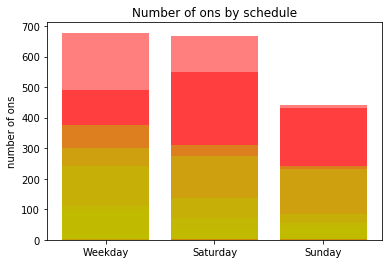

In [3]:
bar_data=metrotransit_df.dropna()
#max_data=metrotransit_df.groupby("Schedule")
#max_data["Ons"]=max_data["Ons"].astype(float)
#max_data.max()
x_axis=bar_data["Schedule"]
ons=bar_data["Ons"].astype(float)
plt.xlabel=("Ons")



plt.bar(x_axis, ons, color=('r','y'), alpha=0.5, align="center")
plt.title("Number of ons by schedule")
#plt.xlabel(str("schedule"))
plt.ylabel("number of ons")


# max_data_df=max_data.max()
# max_data_df


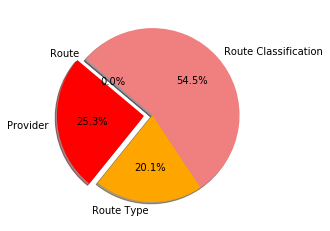

In [4]:
schedule_df = metrotransit_df.groupby("Schedule")
schedule_df=schedule_df.count()
# explode = (0.1,)
# colors = ["red", "orange", "lightcoral", "lightskyblue"]
# x_axis=bar_data["Schedule"]
# ons=bar_data["Ons"].astype(float)

# plt.pie(ons, labels=x_axis, colors=colors,
#         autopct="%1.1f%%", shadow=True, startangle=140)
# plt.show()   
# schedule_df.head()



explode = (0.1,0,0,0)
colors = ["red", "orange", "lightcoral", "lightskyblue"]
x_axis=schedule_df
ons=schedule_df["Ons"].astype(float)

plt.pie(ons, labels=x_axis, colors=colors,
        autopct="%1.1f%%",explode = (0.1,0,0,0), shadow=True, startangle=140)
plt.show()


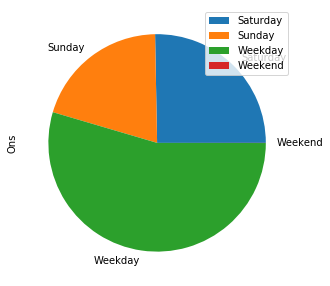

In [5]:
# Route_df = metrotransit_df.groupby("Schedule")
#Route_df.count()
schedule_df.plot.pie(y="Ons",figsize=(5, 5))

In [6]:
# Trips = Route_df["Trips"]

# Route_df = metrotransit_df.groupby("City")

# city_df = Route_df[["City", "Trips", "Ons", "Offs"]]

# # city_df = pd.DataFrame({"Trips": Trips})
# # city_df.head()

# df = pd.DataFrame(city_df, columns = ['Trips', 'Ons', 'Offs']==)
# df

In [7]:
# site_route_df = metrotransit_df.groupby("Site_id")
# site_route_df.count()


